In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb
import warnings as warn

path: str = './data/beauty.csv'
df: pd.DataFrame = pd.read_csv(path, sep=';')
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


# Размер
У нас таблица с 10 колонками и 1260 записями

In [36]:
df.shape

(1260, 10)

# Описание
В колонке WAGE присутствует подозрительное значение 48
Большая часть полей имеет боулевое значение
Значения распределены примерно равномерно

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wage,1260.0,6.306690,4.660639,1.02,3.7075,5.3,7.695,77.72
exper,1260.0,18.206349,11.963485,0.00,8.0000,15.0,27.000,48.00
union,1260.0,0.272222,0.445280,0.00,0.0000,0.0,1.000,1.00
goodhlth,1260.0,0.933333,0.249543,0.00,1.0000,1.0,1.000,1.00
black,1260.0,0.073810,0.261564,0.00,0.0000,0.0,0.000,1.00
female,1260.0,0.346032,0.475892,0.00,0.0000,0.0,1.000,1.00
married,1260.0,0.691270,0.462153,0.00,0.0000,1.0,1.000,1.00
service,1260.0,0.273810,0.446089,0.00,0.0000,0.0,1.000,1.00
educ,1260.0,12.563492,2.624489,5.00,12.0000,12.0,13.000,17.00
looks,1260.0,3.185714,0.684877,1.00,3.0000,3.0,4.000,5.00


# Наличие пропусков и типы данных
В дате отсутствуют пропуски, а данные носят исключительно числовой характер

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [39]:
df.columns

Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

In [40]:
df['wage'].mean(), df['wage'].median(), df['wage'].std(), df['wage'].max(),df['wage'].min()

(6.306690476190469, 5.3, 4.6606390371428486, 77.72, 1.02)

In [41]:
# wages = df.iloc[:1260, 0].values
# df['wage'] = np.where(wages == 77.72, df['wage'].median(), wages)
# df

In [42]:
df['exper'].mean(), df['exper'].median(), df['exper'].std(), df['exper'].max(),df['exper'].min()

(18.206349206349206, 15.0, 11.96348525775782, 48, 0)

In [43]:
df.looks.unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [44]:
df.looks.nunique()

5

In [45]:
df.looks.value_counts()

3    722
4    364
2    142
5     19
1     13
Name: looks, dtype: int64

In [46]:
df.female.value_counts()

0    824
1    436
Name: female, dtype: int64

In [47]:
df[df.female == 1]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
5,3.91,20,0,0,0,1,1,0,12,3
8,5.00,5,0,1,0,1,0,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


In [48]:
df[df.union == 1]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
7,7.69,5,1,1,0,0,0,0,16,4
20,7.69,7,1,1,0,0,0,0,17,4
37,7.69,10,1,1,0,0,1,0,13,2
40,12.31,9,1,1,0,0,0,0,17,3
50,9.16,19,1,1,0,1,1,1,17,4
...,...,...,...,...,...,...,...,...,...,...
1244,12.82,15,1,1,0,0,1,0,13,3
1246,5.39,8,1,1,0,0,1,0,14,3
1249,8.65,10,1,1,0,0,1,0,13,3
1251,6.81,7,1,1,0,0,0,0,12,3


In [49]:
df[(df.female == 1) & (df.goodhlth == 1)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3
...,...,...,...,...,...,...,...,...,...,...
1254,1.79,20,0,1,0,1,1,1,8,3
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3


In [50]:
df[df.female == 1].wage.mean(),df[df.female == 0].wage.mean()

(4.299357798165136, 7.3688228155339734)

In [51]:
int(df[df.female == 1].wage.mean())

4

In [52]:
df[(df.female == 0) & (df.union == 1) & (df.exper <= 10)].wage.max()

12.82

In [53]:
df[(df.female == 1) & (df.married == 1) & (df.exper <= 10)].wage.max()

77.72

In [54]:
df.sort_values(['wage', 'female'], ascending=False)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3
...,...,...,...,...,...,...,...,...,...,...
462,1.16,2,0,1,0,1,0,0,13,4
597,1.16,5,0,1,0,1,1,1,10,3
1226,1.09,8,0,1,0,1,1,1,10,2
1009,1.05,29,0,1,1,0,1,0,5,3


In [55]:
df.wage.apply(lambda x: x ** 3)

0        188.132517
1         78.402752
2        504.358336
3       1548.816893
4       1489.355288
           ...     
1255       4.173281
1256       4.741632
1257      35.611289
1258      12.326391
1259       7.077888
Name: wage, Length: 1260, dtype: float64

In [56]:
df.isna().sum()

wage        0
exper       0
union       0
goodhlth    0
black       0
female      0
married     0
service     0
educ        0
looks       0
dtype: int64

In [57]:
mpl.rcParams['figure.figsize'] = (6, 4)

# Диаграмма рессеивания

Зачисимости привлекательности от дохода не выявленно

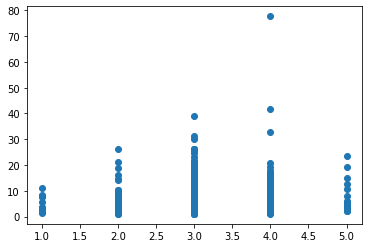

In [58]:
mpl.scatter(df.looks, df.wage)


Зависимость превлекательности от опыта не выражена

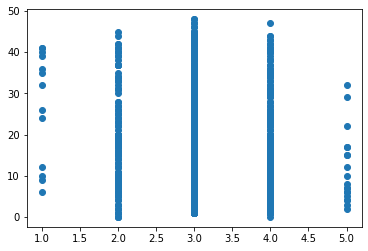

In [59]:
mpl.scatter(df.looks, df.exper)


Зависимость превлекательности от образования не выражена

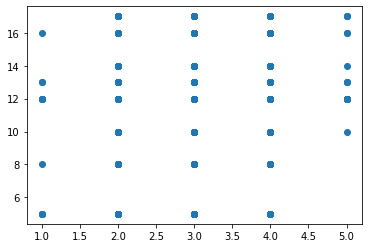

In [60]:
mpl.scatter(df.looks, df.educ)


выборка не сбалансированная
Много 3 и 4, мало 5 и 1

array([[<AxesSubplot:xlabel='wage', ylabel='wage'>,
        <AxesSubplot:xlabel='exper', ylabel='wage'>,
        <AxesSubplot:xlabel='educ', ylabel='wage'>,
        <AxesSubplot:xlabel='looks', ylabel='wage'>],
       [<AxesSubplot:xlabel='wage', ylabel='exper'>,
        <AxesSubplot:xlabel='exper', ylabel='exper'>,
        <AxesSubplot:xlabel='educ', ylabel='exper'>,
        <AxesSubplot:xlabel='looks', ylabel='exper'>],
       [<AxesSubplot:xlabel='wage', ylabel='educ'>,
        <AxesSubplot:xlabel='exper', ylabel='educ'>,
        <AxesSubplot:xlabel='educ', ylabel='educ'>,
        <AxesSubplot:xlabel='looks', ylabel='educ'>],
       [<AxesSubplot:xlabel='wage', ylabel='looks'>,
        <AxesSubplot:xlabel='exper', ylabel='looks'>,
        <AxesSubplot:xlabel='educ', ylabel='looks'>,
        <AxesSubplot:xlabel='looks', ylabel='looks'>]], dtype=object)

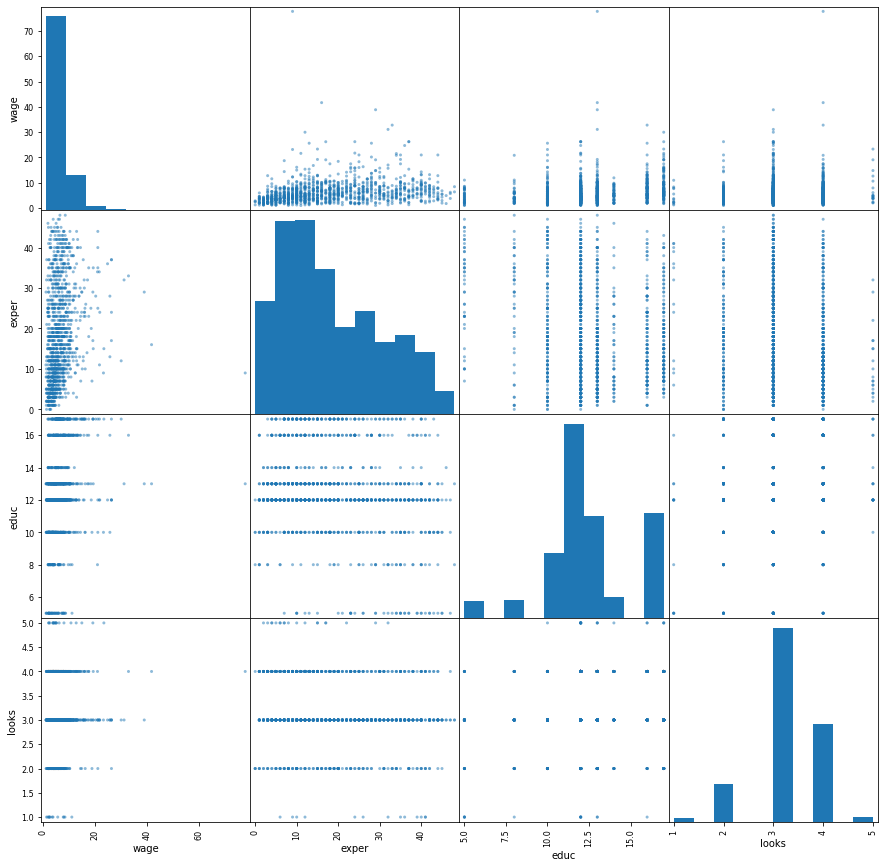

In [61]:
pd.plotting.scatter_matrix(df[['wage', "exper", "educ", "looks"]], figsize=(15, 15))

c:\Users\VPR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wage', ylabel='looks'>

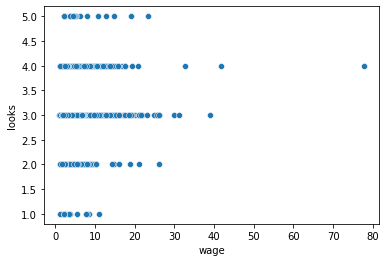

In [62]:
sb.scatterplot(df.wage, df.looks)

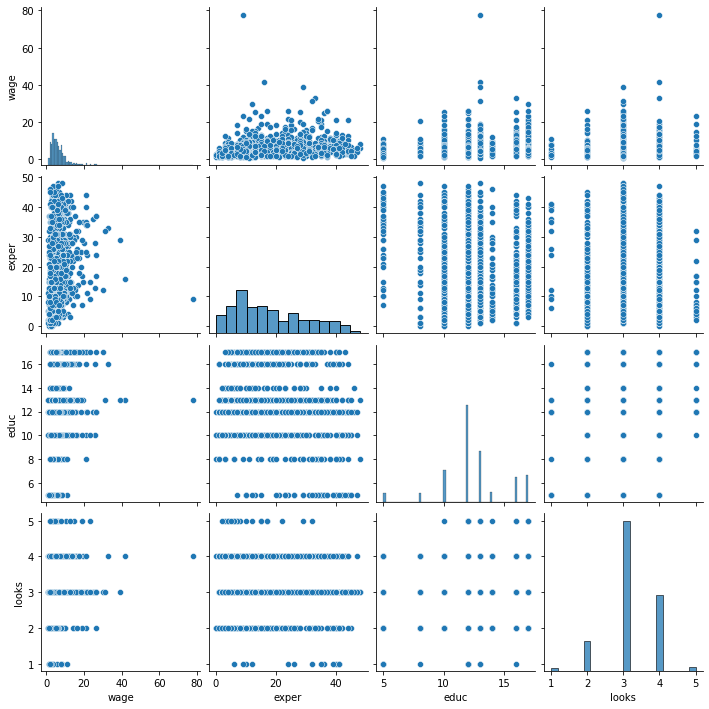

In [63]:
sb.pairplot(df[['wage', "exper", "educ", "looks"]])

# Гистограммы распределения

(array([ 35., 117., 103., 151., 156., 108., 107.,  88.,  94.,  77.,  44.,
         51.,  25.,  15.,  12.,  15.,   5.,   7.,   5.,   9.,   2.,   3.,
          2.,   5.,   1.,   1.,   6.,   1.,   1.,   1.,   1.,   0.,   6.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 1.02 ,  1.787,  2.554,  3.321,  4.088,  4.855,  5.622,  6.389,
         7.156,  7.923,  8.69 ,  9.457, 10.224, 10.991, 11.758, 12.525,
        13.292, 14.059, 14.826, 15.593, 16.36 , 17.127, 17.894, 18.661,
        19.428, 20.195, 20.962, 21.729, 22.496, 23.263, 24.03 , 24.797,
        25.564, 26.331, 27.098

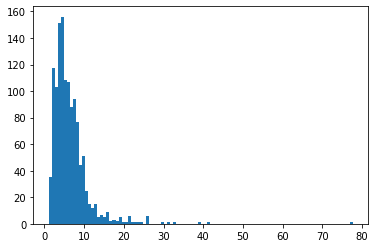

In [64]:
mpl.hist(df.wage, bins=100)

<AxesSubplot:>

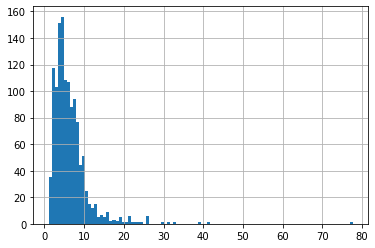

In [65]:
df.wage.hist(bins=100)

In [66]:
warn.filterwarnings('ignore ')

array([[<AxesSubplot:title={'center':'wage'}>,
        <AxesSubplot:title={'center':'exper'}>,
        <AxesSubplot:title={'center':'union'}>],
       [<AxesSubplot:title={'center':'goodhlth'}>,
        <AxesSubplot:title={'center':'black'}>,
        <AxesSubplot:title={'center':'female'}>],
       [<AxesSubplot:title={'center':'married'}>,
        <AxesSubplot:title={'center':'service'}>,
        <AxesSubplot:title={'center':'educ'}>],
       [<AxesSubplot:title={'center':'looks'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

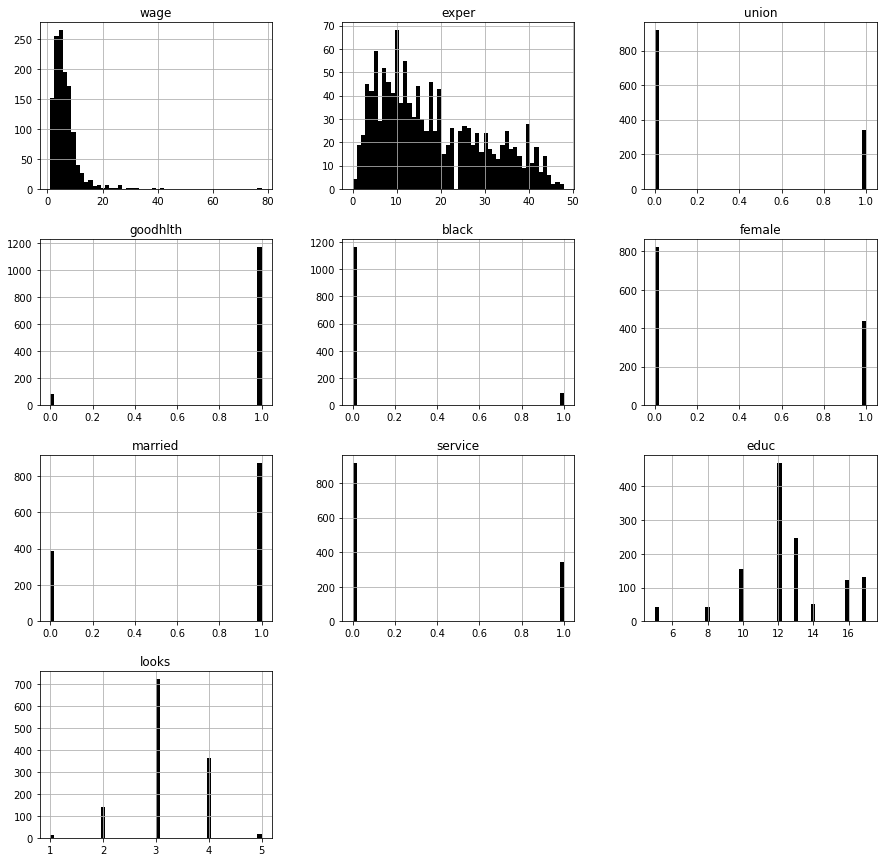

In [75]:
df.hist(figsize=(15,15), bins=50, color='black')

<AxesSubplot:>

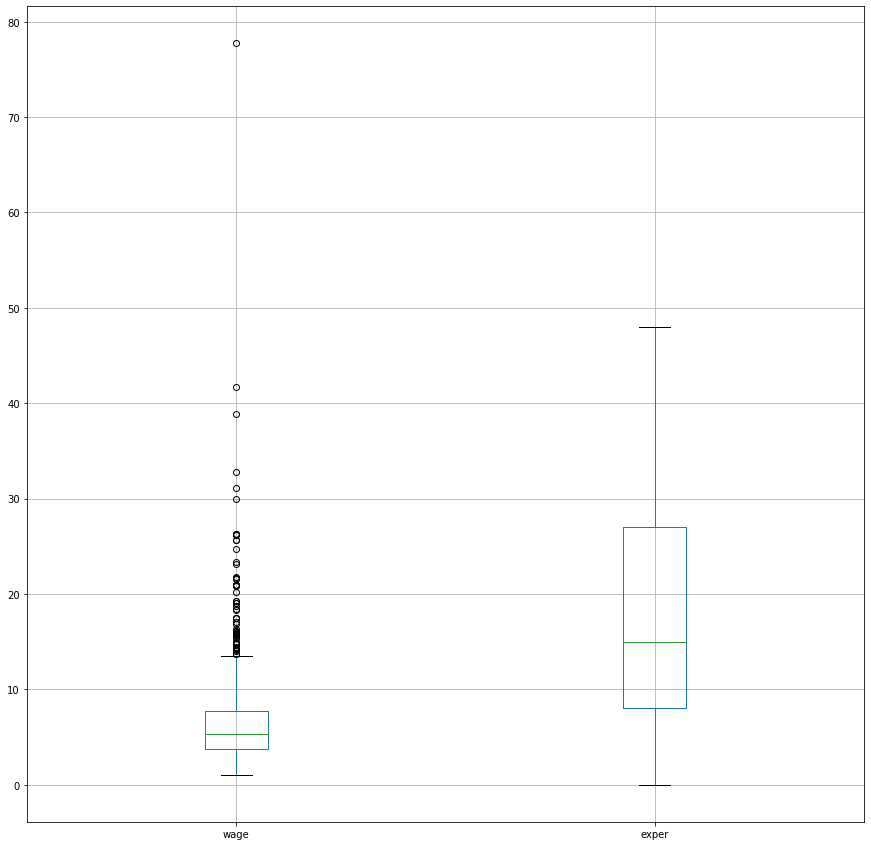

In [81]:
df.boxplot(figsize=(15, 15), column=['wage', 'exper'])

<AxesSubplot:title={'center':'wage'}, xlabel='looks'>

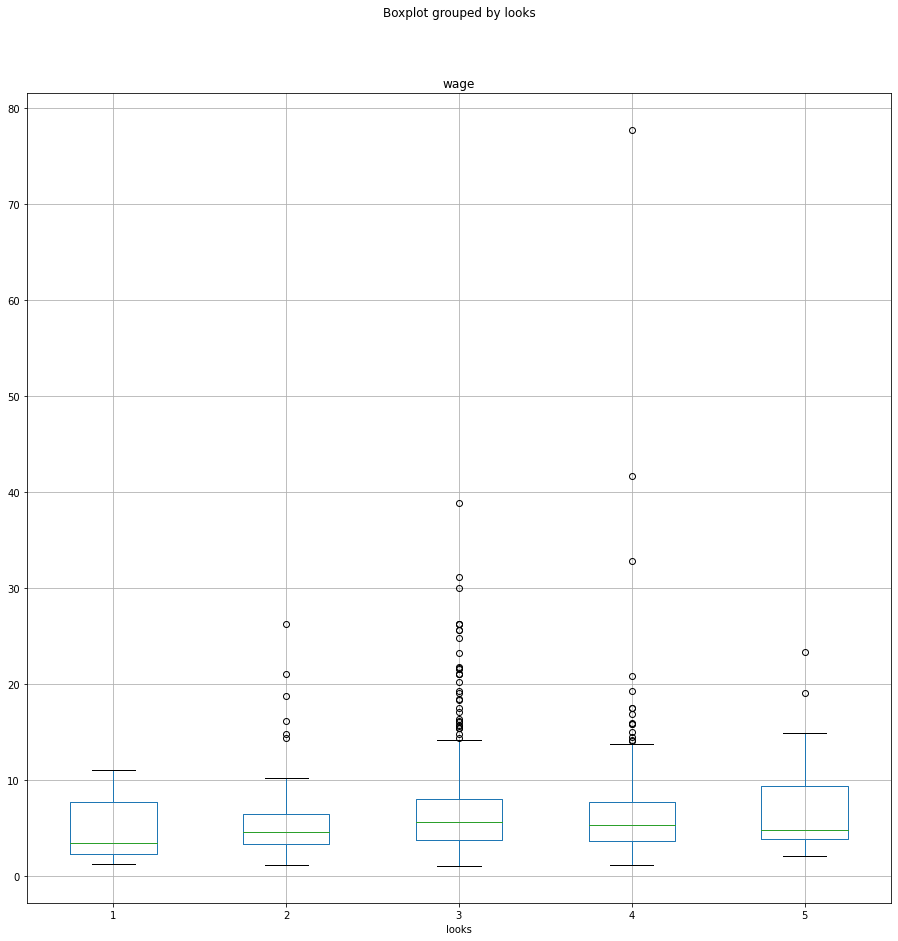

In [83]:
df.boxplot(figsize=(15, 15), column='wage', by='looks')

<AxesSubplot:title={'center':'exper'}, xlabel='looks'>

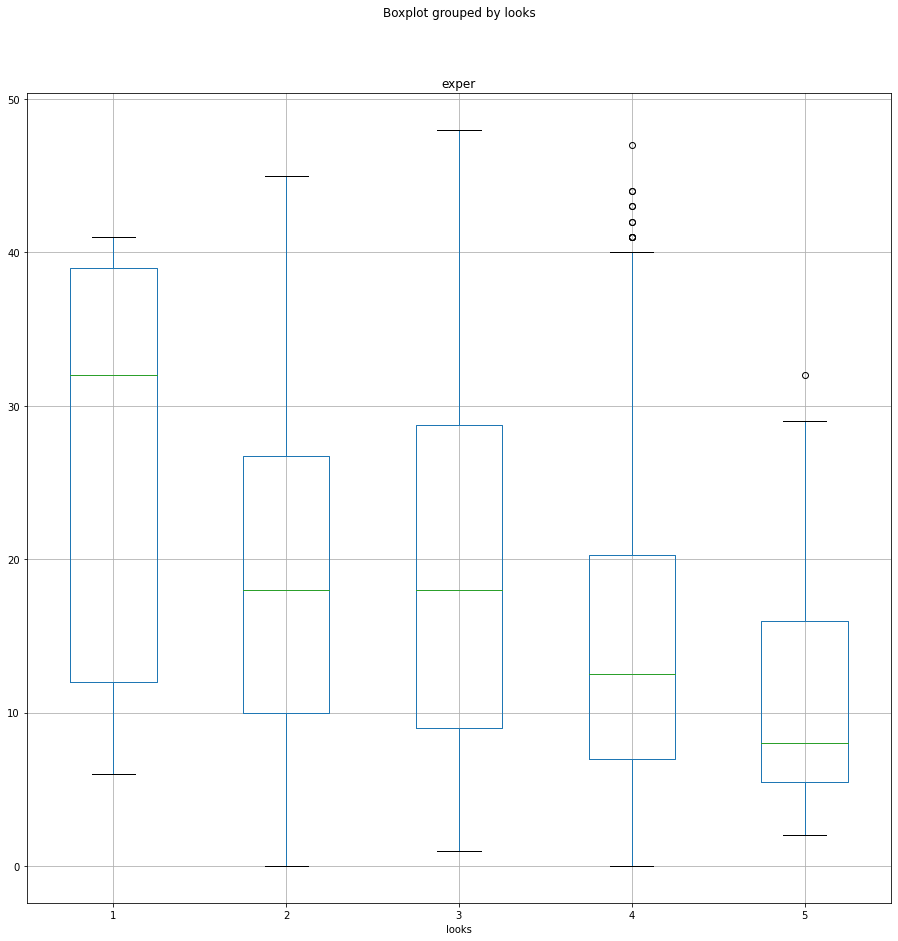

In [84]:
df.boxplot(figsize=(15, 15), column='exper', by='looks')

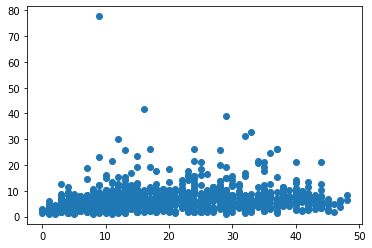

In [87]:
mpl.scatter(df.exper, df.wage)

<AxesSubplot:xlabel='looks', ylabel='exper'>

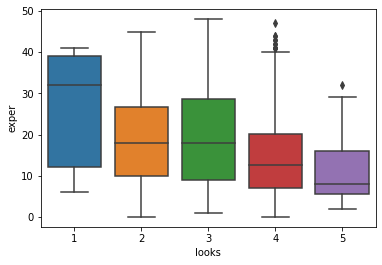

In [92]:
sb.boxplot(data=df, x='looks', y='exper')

# Обычный график в координатах

<AxesSubplot:>

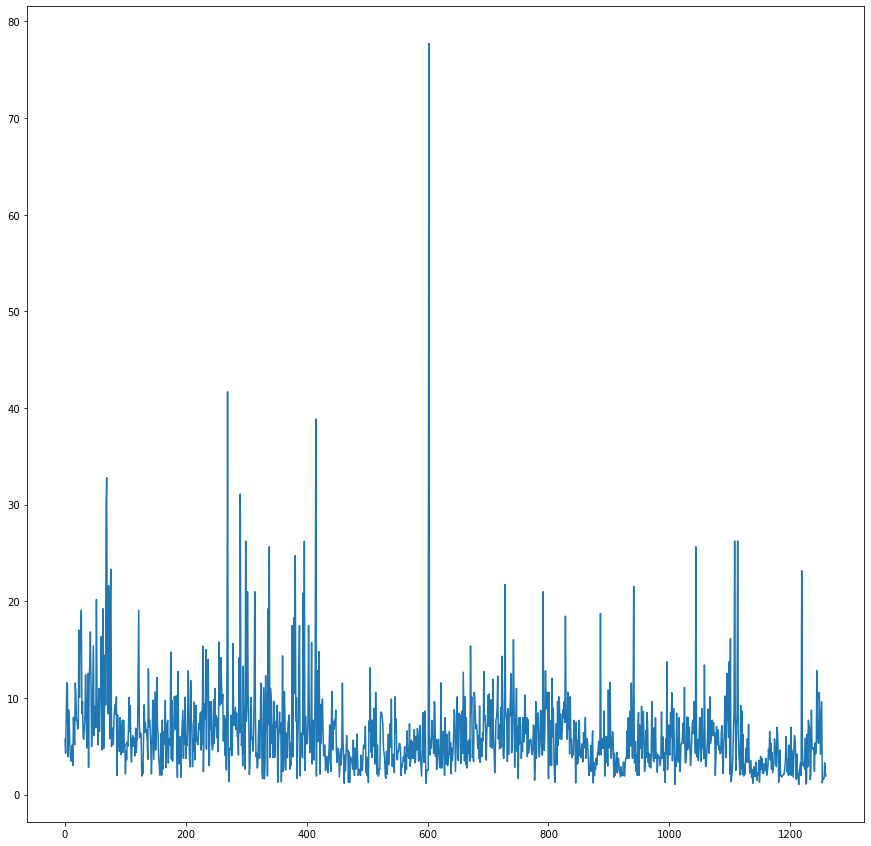

In [95]:
df.wage.plot(figsize=(15,15))

<AxesSubplot:xlabel='looks', ylabel='count'>

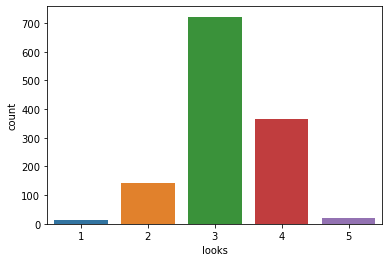

In [103]:
sb.countplot(df.looks)

# Violintplot

<AxesSubplot:xlabel='looks', ylabel='exper'>

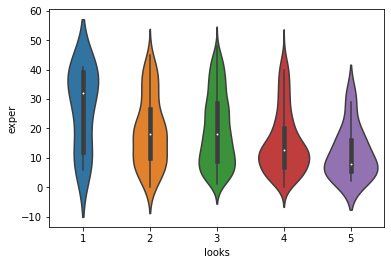

In [105]:
sb.violinplot(data=df, x='looks', y='exper')

# Корреляционная матрица


In [106]:
df.corr()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,1.000000,0.234632,0.094529,0.006756,-0.059052,-0.313419,0.184521,-0.053653,0.212333,0.055019
exper,0.234632,1.000000,0.089792,-0.131609,0.007566,-0.247209,0.255607,-0.057328,-0.186200,-0.155035
union,0.094529,0.089792,1.000000,-0.022398,0.031939,-0.100037,0.053629,-0.103633,-0.096022,-0.043495
goodhlth,0.006756,-0.131609,-0.022398,1.000000,-0.034073,-0.039684,-0.013315,0.049947,0.107129,0.058558
black,-0.059052,0.007566,0.031939,-0.034073,1.000000,0.113703,-0.133306,0.017261,-0.138157,0.012098
female,-0.313419,-0.247209,-0.100037,-0.039684,0.113703,1.000000,-0.319228,0.267961,0.009105,0.017129
married,0.184521,0.255607,0.053629,-0.013315,-0.133306,-0.319228,1.000000,-0.075082,-0.047674,-0.064636
service,-0.053653,-0.057328,-0.103633,0.049947,0.017261,0.267961,-0.075082,1.000000,0.301628,0.010213
educ,0.212333,-0.186200,-0.096022,0.107129,-0.138157,0.009105,-0.047674,0.301628,1.000000,0.153842
looks,0.055019,-0.155035,-0.043495,0.058558,0.012098,0.017129,-0.064636,0.010213,0.153842,1.000000


<AxesSubplot:>

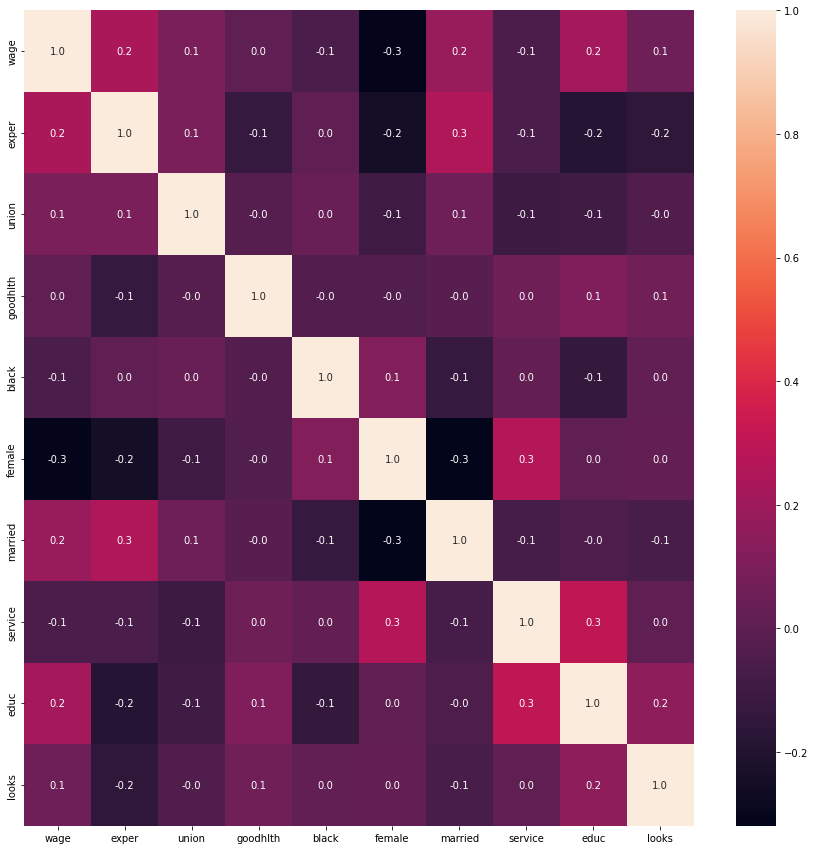

In [114]:
mpl.figure(figsize=(15,15))
sb.heatmap(df.corr(), annot=True, fmt='.1f')